# part 1

In [1]:
from sklearn import datasets
import numpy as np

# import the rao data
iris = datasets.load_iris()
# field iris.data is an array, each column of which is a feature， vector for one sample, 
# field iris.target with is a column vector defining the class labels


In [2]:
# Define s1, s2, s3, s4, s5, s6, s7 to be the 1st to 7th digits of your KCL student ID number,
s1, s2, s3, s4, s5, s6, s7 = 1, 9, 2, 9, 1, 4, 9
# create this test set, Xtest

S_test=np.array([[s1, s2, s3, s4, s5, s6, s7],[s2, s3, s4, s5, s6, s7, s1],
[s3, s4, s5, s6, s7, s1, s2],[s4, s5, s6, s7, s1, s2, s3]]);

S_test=S_test/np.array([2.3,4,1.5,4]).reshape(-1,1);
X_test=S_test+np.array([4,2,1,0]).reshape(-1,1)
print(X_test)

[[4.43478261 7.91304348 4.86956522 7.91304348 4.43478261 5.73913043
  7.91304348]
 [4.25       2.5        4.25       2.25       3.         4.25
  2.25      ]
 [2.33333333 7.         1.66666667 3.66666667 7.         1.66666667
  7.        ]
 [2.25       0.25       1.         2.25       0.25       2.25
  0.5       ]]


In [3]:
print(iris.data.shape)
print(X_test.shape)
print(iris.target.shape)

(150, 4)
(4, 7)
(150,)


In [4]:
# knn k=3 or 7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
X_train, y_train = iris.data, iris.target

# k=3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test.transpose())
print('k=3: ', y_pred)

# k=7
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test.transpose())
print('k=7: ', y_pred)


k=3:  [0 2 0 1 2 0 2]
k=7:  [0 2 0 1 2 0 2]


For k = 3, the predicted sample in Xtest is [0 2 0 1 2 0 2]. For k = 7, the result is the same

# part 2

In [5]:
Xt = np.array([[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]])
y_class = np.array([[1], [1], [1], [-1], [-1], [-1]])
# Using Augmented notation and sample normalisation, dataset is:
yt = np.append(y_class, Xt*y_class, axis=1)

# yt = np.array([[1, 0, 2], [1, 1, 2], [1, 2, 1], [-1, 3, -1], [-1, 2, 1], [-1, 3, 2]])

yt

array([[ 1,  0,  2],
       [ 1,  1,  2],
       [ 1,  2,  1],
       [-1,  3, -1],
       [-1,  2,  1],
       [-1,  3,  2]])

In [6]:
# initial values
at = np.array([1, 0, 0])
# learing rate
lr = 0.1

#b = np.array([[1], [1], [1], [1], [1], [1]])
# margin vector 
b = np.array([[s1], [s2], [s3], [s4], [s5], [s6]])

b

array([[1],
       [9],
       [2],
       [9],
       [1],
       [4]])

In [7]:
# For the Sequential Widrow-Hoff Learning Algorithm, weights are updated
def weight_update(a, lr, bk, yk):
    a_updated = a + lr * (bk - np.dot(a.transpose(), yk)) * yk
    return a_updated

In [8]:
# margin vector not changed
b = np.array([[1], [1], [1], [1], [1], [1]])
for k in range(0, 12):
    at = weight_update(at, lr, b[k%6], yt[k%6])
    print(at)
        

[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[ 0.8  0.6 -0.2]
[ 0.72  0.76 -0.12]
[ 0.752  0.664 -0.184]
[ 0.8136  0.664  -0.0608]
[ 0.778   0.6284 -0.132 ]
[ 0.68772  0.44784 -0.22228]
[ 0.675528  0.484416 -0.234472]
[ 0.5814112  0.6726496 -0.1403552]
[ 0.59699392  0.62590144 -0.17152064]


In [9]:
# margin vector changed
b = np.array([[s1], [s2], [s3], [s4], [s5], [s6]])

for k in range(0, 12):
    at = weight_update(at, lr, b[k%6], yt[k%6])
    print(at)

[ 0.67159866  0.62590144 -0.02231117]
[1.44631088 1.40061366 1.52711328]
[1.06884573 0.64568337 1.14964813]
[0.14070135 3.4301165  0.22150375]
[ 0.73480489  2.24190942 -0.37259978]
[ 0.85937727  1.86819228 -0.62174454]
[ 0.99778845  1.86819228 -0.34492218]
[1.68017482 2.55057864 1.01985055]
[1.10005655 1.39034211 0.43973228]
[ 0.4631803   3.30097086 -0.19714397]
[ 0.95734205  2.31264737 -0.69130571]
[ 1.01714091  2.13325078 -0.81090344]


the parameters of the discriminant function learnt at each iteration are shown 

# part 3

In [10]:
# linearly separable data set
Xt = np.array([[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]])
y_class = np.array([[1], [1], [1], [0], [0], [0]])

In [11]:
# initial values and a learning rate
theta = -1
w1 = 0
w2 = 0
lr = 1

In [12]:
# augmented notation
w = [-theta, w1, w2]
xt = np.append(np.ones((6, 1)), Xt, axis=1)
xt

array([[ 1.,  0.,  2.],
       [ 1.,  1.,  2.],
       [ 1.,  2.,  1.],
       [ 1., -3.,  1.],
       [ 1., -2., -1.],
       [ 1., -3., -2.]])

In [13]:
# heaviside function
def H(x):
    if x>0:
        return 1
    elif x<0:
        return 0
    else:
        return 0
    

In [14]:
# the Sequential Delta Learning Algorithm, weights-updating function
def weight_update(w, lr, t, y, xt):
    w_updated = w + lr * (t-y)*xt
    return w_updated

In [15]:
for k in range(0, 13):
    y = H(np.dot(w, xt[k%6].transpose()))
    w = weight_update(w, lr, y_class[k%6], y, xt[k%6])
    print(w)

[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[ 0.  3. -1.]
[ 0.  3. -1.]
[ 0.  3. -1.]
[1. 3. 1.]
[1. 3. 1.]
[1. 3. 1.]
[1. 3. 1.]
[1. 3. 1.]
[1. 3. 1.]
[1. 3. 1.]


In [16]:
# change the intial values 
theta = -s3
w1 = -s4
w2 = s5

w = [-theta, w1, w2]

In [17]:
for k in range(0, 13):
    y = H(np.dot(w, xt[k%6].transpose()))
    w = weight_update(w, lr, y_class[k%6], y, xt[k%6])
    print(w)

[ 2. -9.  1.]
[ 3. -8.  3.]
[ 4. -6.  4.]
[ 3. -3.  3.]
[ 2. -1.  4.]
[ 2. -1.  4.]
[ 2. -1.  4.]
[ 2. -1.  4.]
[ 2. -1.  4.]
[1. 2. 3.]
[1. 2. 3.]
[1. 2. 3.]
[1. 2. 3.]


Learning has converged whithin 13 iterations, so required parameters are w = (1, 2, 3).

# part 4

In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# Import from sklearn.metrics the function confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

# sing five epochs fits the model to the data
num_classes = 10
epochs = 5

Using TensorFlow backend.


In [19]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalize the image data in x_train and x_test (from 0 to 255)
# rescale this from 0 to 1

x_train = x_train/255

x_test= x_test/255
# split the training data into validation and training data 
# for cross validation
x_train, x_validate, y_train, y_validate = train_test_split(x_train,y_train, test_size = 0.2, random_state = 7788)

(48000, 28, 28)


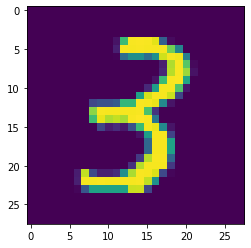

In [20]:
# visualise the image to have a look 
print(x_train.shape)

image = x_train[10,:]
plt.imshow(image)
plt.show()

In [21]:
# Define model
nrows = 28
ncols = 28
batch = 512

image_shape = (nrows, ncols, 1) # 3d with rows and columns
# formate the x_train, x_test and x_validate sets.
print (x_train.shape)

x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

print (x_train.shape)

(48000, 28, 28)
(48000, 28, 28, 1)


In [22]:
# Use the Keras Sequential approach to building neural net.
# Use the ReLU activation function for the layer
# Use 512 (2^9) units for the hidden layer.

model_cnn = Sequential([
    Flatten(), # flatten out the layers
    Dense(512,activation='relu'),
    Dense(10,activation = 'softmax')
])

# complie the mode 
model_cnn.compile(loss ='sparse_categorical_crossentropy', 
                  optimizer=Adam(lr=0.001), 
                  metrics =['accuracy'])

model_cnn.fit(
    x_train,
    y_train,
    batch_size=batch,
    epochs=epochs,
    verbose=1,
    validation_data=(x_validate, y_validate),
)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 54us/step - loss: 0.4606 - acc: 0.8743 - val_loss: 0.2358 - val_acc: 0.9332
Epoch 2/5
48000/48000 [==============================] - 2s 42us/step - loss: 0.1977 - acc: 0.9445 - val_loss: 0.1704 - val_acc: 0.9507
Epoch 3/5
48000/48000 [==============================] - 2s 39us/step - loss: 0.1439 - acc: 0.9605 - val_loss: 0.1465 - val_acc: 0.9572
Epoch 4/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.1115 - acc: 0.9684 - val_loss: 0.1201 - val_acc: 0.9650
Epoch 5/5
48000/48000 [==============================] - 2s 36us/step - loss: 0.0875 - acc: 0.9761 - val_loss: 0.1071 - val_acc: 0.9677


In [23]:
# Print the confusion matrix of the errors on the test data.
y_pred = model_cnn.predict(x_test)

matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

print(matrix)

names= ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
 
print('Classification Report')
print(classification_report(y_test, y_pred.argmax(axis=1), target_names=names))

[[ 972    0    2    1    2    0    0    2    1    0]
 [   0 1120    3    1    0    1    3    1    6    0]
 [   4    1 1002    1    2    0    2    6   14    0]
 [   0    0    5  984    0    3    1    6   10    1]
 [   2    0    5    1  953    0    3    4    2   12]
 [   5    1    0   10    2  856    7    1    9    1]
 [   6    3    3    1    9    5  923    1    7    0]
 [   2    6   13    3    1    1    0  993    4    5]
 [   4    0    3    7    3    3    2    3  948    1]
 [   5    7    1    8   13    1    1    9   11  953]]
Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.97      0.99      0.98       980
     Trouser       0.98      0.99      0.99      1135
    Pullover       0.97      0.97      0.97      1032
       Dress       0.97      0.97      0.97      1010
        Coat       0.97      0.97      0.97       982
      Sandal       0.98      0.96      0.97       892
       Shirt       0.98      0.96      0.97       958
     Sneaker  

The data set is called MNIST. Ｔhere are ten classes, showing pictures of headwriting digitals. These items are stored in low-resolution 28X28. images made up of integers between zero and 255, indicating the grey scale of the pixel they are representing. 

CNN model was chosen for implementation. We wrote a script implementing a one hidden-layer neural network to learn various digitals items. Used the Keras Sequential approach to build neural net. Used the ReLU activation function for the layer. 512 units for the hidden layer were applied. Used 5 epochs to fit the model to the data.

The accuracy on my test set is 97%. Also the results on test data are showed by confusion matrix. these names are in order ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
